In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('results.csv', sep=';', header=0)
df['code_assistant_type'] = df['code_assistant_type'].str.replace('Assistant', '')
df.head()



,code_assistant_type,prompt_type,dataset_name,report_path,error_count,code_messages_missing_snippets,msg_count,analysis_message_limit,exception
0,LLaMA2Chat,ZeroShot,wine-quality.csv,reports/wine-quality_1_2024-01-23-23-56-21.pdf,4,0,2,8,Code assistant exceeded retry limit for code e...
1,LLaMA2Chat,FewShot,wine-quality.csv,reports/wine-quality_4_2024-01-23-23-57-20.pdf,0,4,8,8,NaN
2,OpenAI,ZeroShot,wine-quality.csv,reports/wine-quality_2_2024-01-23-23-58-53.pdf,0,0,8,8,NaN
3,OpenAI,FewShot,wine-quality.csv,reports/wine-quality_5_2024-01-23-23-59-57.pdf,0,0,1,8,timed out
4,Mixtral8x7B,ZeroShot,wine-quality.csv,reports/wine-quality_3_2024-01-24-00-00-37.pdf,0,0,5,8,Invalid response or text not found


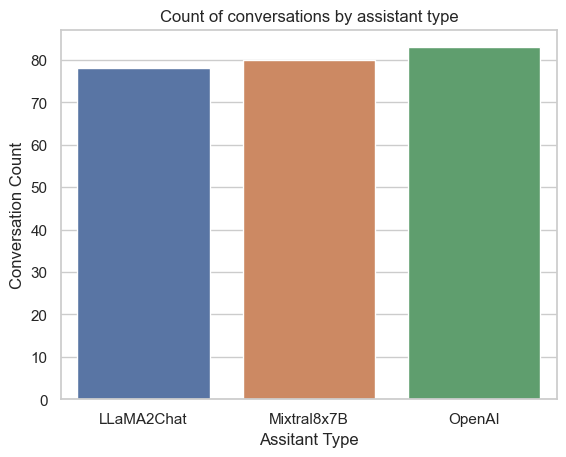

In [42]:


grouped = df.groupby('code_assistant_type').size().reset_index(name='counts')
grouped['code_assistant_type'] = grouped['code_assistant_type'].str.replace('Assistant', '')

sns.barplot(data=grouped, x='code_assistant_type', y='counts')

plt.xlabel('Assitant Type')
plt.ylabel('Conversation Count')
plt.title('Count of conversations by assistant type')

plt.show()


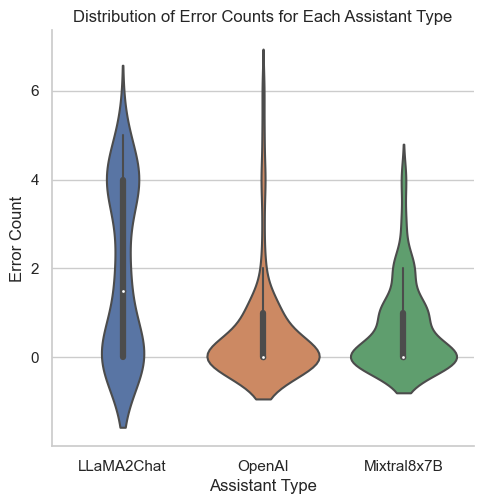

In [43]:
sns.catplot(data=df, x='code_assistant_type', y='error_count', kind='violin')

plt.xlabel('Assistant Type')
plt.ylabel('Error Count')
plt.title('Distribution of Error Counts for Each Assistant Type')

plt.show()

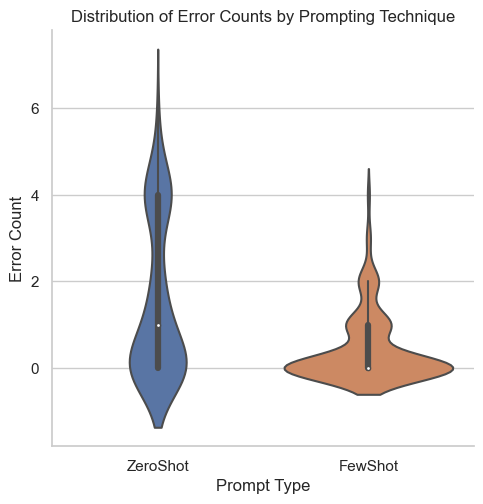

In [44]:
sns.catplot(data=df, x='prompt_type', y='error_count', kind='violin')

plt.xlabel('Prompt Type')
plt.ylabel('Error Count')
plt.title('Distribution of Error Counts by Prompting Technique')

plt.show()

Text(0.5, 1.0, 'Combined Distribution of Error Counts and Missing Snippets by Prompting Technique')

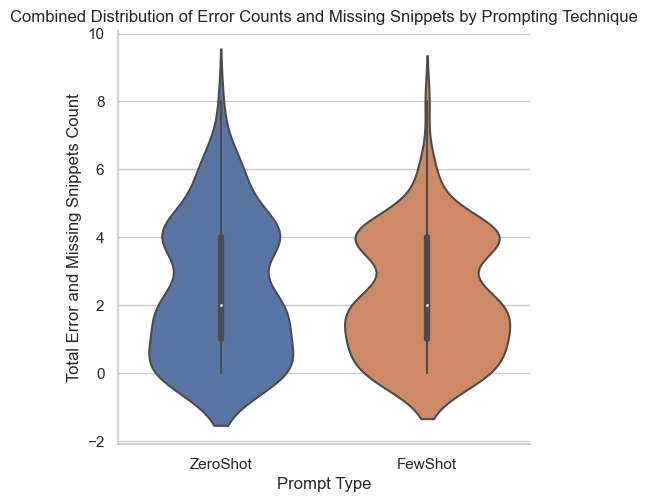

In [45]:
df['total_errors'] = df['error_count'] + df['code_messages_missing_snippets']

sns.catplot(data=df, x='prompt_type', y='total_errors', kind='violin')

plt.xlabel('Prompt Type')
plt.ylabel('Total Error and Missing Snippets Count')
plt.title('Combined Distribution of Error Counts and Missing Snippets by Prompting Technique')


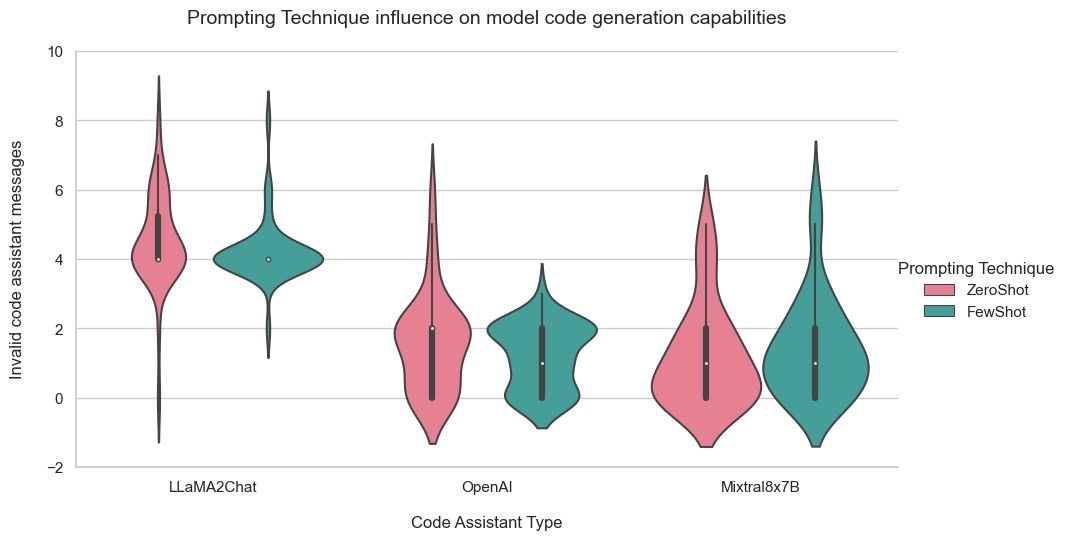

In [46]:
df["total_errors"] = df["error_count"] + df["code_messages_missing_snippets"]

ax = sns.catplot(
    data=df,
    x="code_assistant_type",
    y="total_errors",
    hue="prompt_type",
    kind="violin",
    aspect=1.8,
    palette="husl",
)


new_title = "Prompting Technique"
ax._legend.set_title(new_title)
legend = ax._legend
legend.set_bbox_to_anchor((1.05, 0.5))

plt.xlabel("Code Assistant Type", fontsize=12, labelpad=15)
plt.ylabel("Invalid code assistant messages", fontsize=12, labelpad=15)
plt.title(
    "Prompting Technique influence on model code generation capabilities",
    fontsize=14,
    pad=20,
)
plt.ylim(-2, 10)

# Errors are counted as the sum of error_count and code_messages_missing_snippets, since from the user's perspective this messages are not bringing any value to the progress of the analysis
# Check the data for the number
plt.savefig("prompting_technique_influence_code_generation.png", bbox_inches="tight", dpi=300)
#plt.show()

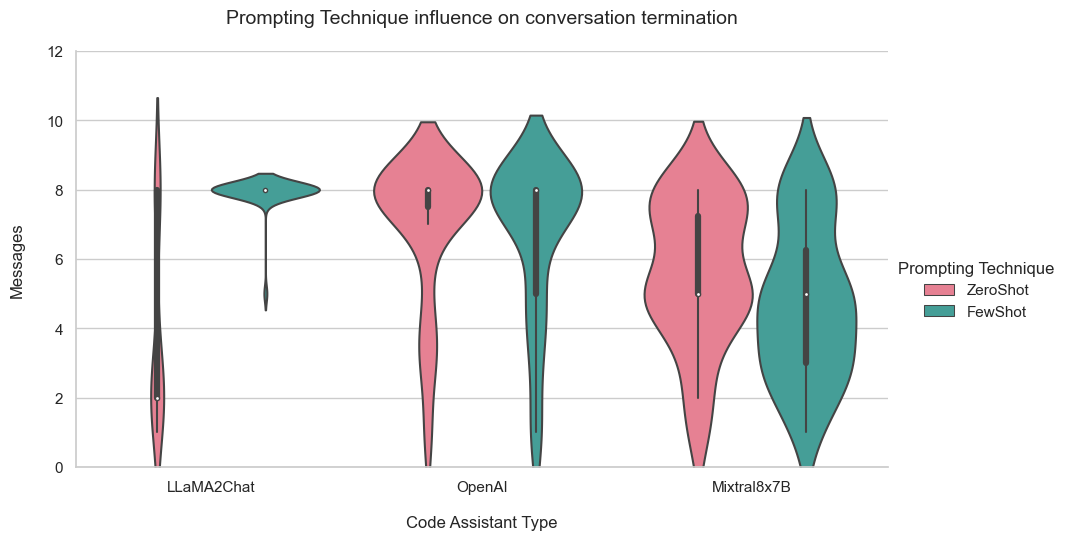

In [47]:
# msg_count distribution by model and pormpting technique
# Create a new column that is the sum of 'error_count' and 'code_messages_missing_snippets'

# Plotting the distribution grouped by both 'prompt_type' and 'code_assistant_type'
ax = sns.catplot(
    data=df, 
    x='code_assistant_type', 
    y='msg_count', 
    hue='prompt_type', 
    kind='violin',
    palette='husl',
    aspect=1.8,
    )

new_title = 'Prompting Technique'
ax._legend.set_title(new_title)
legend = ax._legend
legend.set_bbox_to_anchor((1.05, .5))
# Conversation length should be 8 if it is smaller, then it means that the conversation was terminated prematurely, due to the exception 
plt.xlabel('Code Assistant Type', fontsize=12, labelpad=15)
plt.ylabel('Messages', fontsize=12, labelpad=15)
plt.title('Prompting Technique influence on conversation termination', fontsize=14, pad=20)
plt.ylim(0,12)

plt.show()
#plt.savefig('prompting_technique_influence_msg_count.png', bbox_inches='tight', dpi=300)

/var/folders/yd/2rqckjys25zbdvvts64958bh0000gn/T/ipykernel_19703/437403272.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="code_assistant_type", y="success_rate", hue="prompt_type", data=df, palette="husl", ci=None)


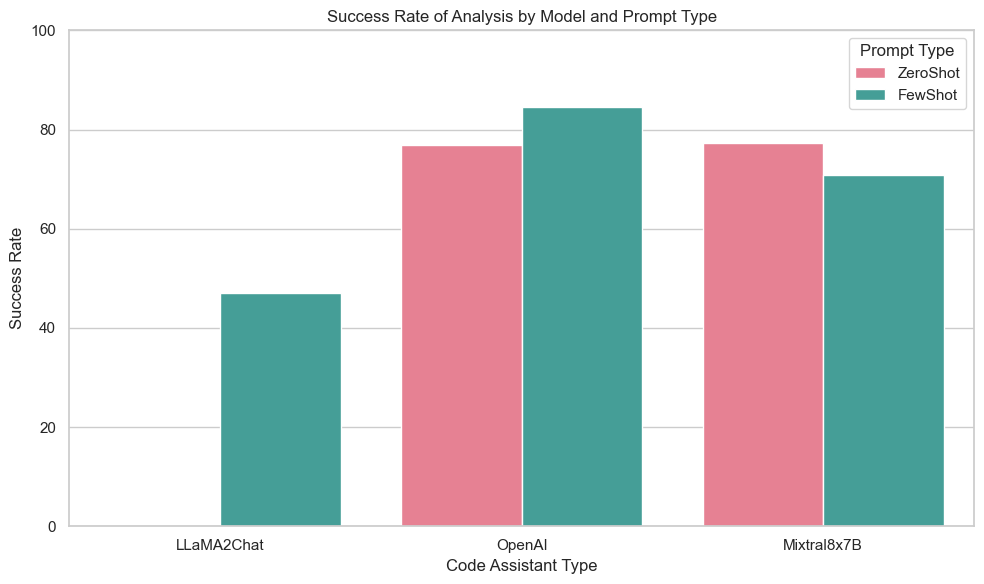

In [48]:
df['success_rate'] = (df['msg_count'] - df['total_errors']) / df['msg_count'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x="code_assistant_type", y="success_rate", hue="prompt_type", data=df, palette="husl", ci=None)
plt.title('Success Rate of Analysis by Model and Prompt Type')
plt.xlabel('Code Assistant Type')
plt.ylabel('Success Rate')
plt.ylim(0, 100)
plt.legend(title='Prompt Type')
plt.tight_layout()
#plt.savefig('msg_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
df_assistant = df[df['code_assistant_type'] == 'OpenAI']
grouped = df_assistant.groupby(['code_messages_missing_snippets', 'prompt_type']).size().reset_index(name='counts')
#grouped = df_ass.groupby(['error_count', 'prompt_type']).size().reset_index(name='counts')

grouped = grouped[grouped['prompt_type'] == 'FewShot']
grouped

,code_messages_missing_snippets,prompt_type,counts
0,0,FewShot,17
2,1,FewShot,6
4,2,FewShot,17


In [50]:
# group by exception
grouped = df.groupby(['exception']).size().reset_index(name='counts').sort_values(by="counts")
grouped.head()

,exception,counts
1,Connection error.,1
2,Connection is already closed.,1
3,"Error code: 400 - {'error': {'message': ""This ...",1
4,"Error code: 400 - {'error': {'message': ""This ...",1
5,"Error code: 400 - {'error': {'message': ""This ...",1


In [51]:
column_list = grouped['exception'].tolist()
column_list

['Connection error.',
 'Connection is already closed.',
 'Error code: 400 - {\'error\': {\'message\': "This model\'s maximum context length is 16385 tokens. However, your messages resulted in 18117 tokens. Please reduce the length of the messages.", \'type\': \'invalid_request_error\', \'param\': \'messages\', \'code\': \'context_length_exceeded\'}}',
 'Error code: 400 - {\'error\': {\'message\': "This model\'s maximum context length is 16385 tokens. However, your messages resulted in 28310 tokens. Please reduce the length of the messages.", \'type\': \'invalid_request_error\', \'param\': \'messages\', \'code\': \'context_length_exceeded\'}}',
 'Error code: 400 - {\'error\': {\'message\': "This model\'s maximum context length is 16385 tokens. However, your messages resulted in 29152 tokens. Please reduce the length of the messages.", \'type\': \'invalid_request_error\', \'param\': \'messages\', \'code\': \'context_length_exceeded\'}}',
 'Expecting value: line 1 column 1 (char 0)',
 '[E

In [52]:
df.head()

,code_assistant_type,prompt_type,dataset_name,report_path,error_count,code_messages_missing_snippets,msg_count,analysis_message_limit,exception,total_errors,success_rate
0,LLaMA2Chat,ZeroShot,wine-quality.csv,reports/wine-quality_1_2024-01-23-23-56-21.pdf,4,0,2,8,Code assistant exceeded retry limit for code e...,4,-100.0
1,LLaMA2Chat,FewShot,wine-quality.csv,reports/wine-quality_4_2024-01-23-23-57-20.pdf,0,4,8,8,NaN,4,50.0
2,OpenAI,ZeroShot,wine-quality.csv,reports/wine-quality_2_2024-01-23-23-58-53.pdf,0,0,8,8,NaN,0,100.0
3,OpenAI,FewShot,wine-quality.csv,reports/wine-quality_5_2024-01-23-23-59-57.pdf,0,0,1,8,timed out,0,100.0
4,Mixtral8x7B,ZeroShot,wine-quality.csv,reports/wine-quality_3_2024-01-24-00-00-37.pdf,0,0,5,8,Invalid response or text not found,0,100.0


In [53]:
mapping = {
    'Connection error.' : "LLM failure",
    'Connection is already closed.': "Runtime error",
    'Expecting value: line 1 column 1 (char 0)': "Runtime error",
    '[Errno 32] Broken pipe': "Runtime error",
    'timed out': "Runtime error",
    'Code assistant exceeded retry limit for code execution and could not fix the code for 3 consecutive times.': "Code generation limit exceeded",
    'Invalid response or text not found': "LLM failure"
}
def map_error_message(msg):
    if not isinstance(msg, str):
        return msg
    if msg.startswith('Error code: 400 '):
        return 'Context overflow'
    else:
        return mapping[msg]
df['merged_exceptions'] = df['exception'].map(map_error_message).fillna(df['exception'])


In [54]:
exceptions_df = df.groupby(['merged_exceptions', 'code_assistant_type']).size().reset_index(name='counts')

In [55]:
exceptions_df.head()

,merged_exceptions,code_assistant_type,counts
0,Code generation limit exceeded,LLaMA2Chat,26
1,Code generation limit exceeded,Mixtral8x7B,2
2,Code generation limit exceeded,OpenAI,4
3,Context overflow,OpenAI,3
4,LLM failure,LLaMA2Chat,1


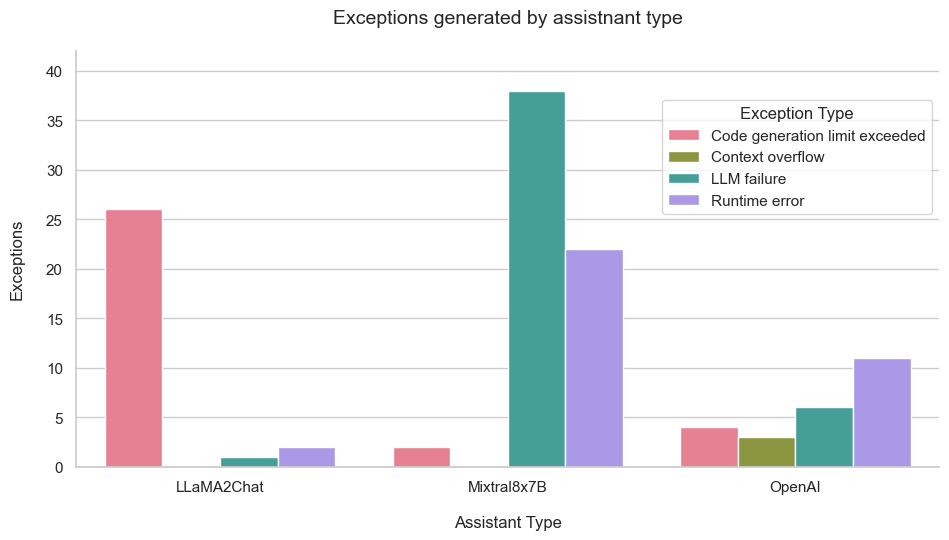

In [56]:
ax = sns.catplot(
    data=exceptions_df,
    x="code_assistant_type",
    y="counts",
    hue="merged_exceptions",
    kind="bar",
    aspect=1.9,
    palette='husl',
    legend_out=False,
)
plt.xlabel('Assistant Type', fontsize=12, labelpad=15)
plt.ylabel('Exceptions', fontsize=12, labelpad=15)
plt.title('Exceptions generated by assistnant type', fontsize=14, pad=20)
plt.ylim(0, 42)  # Set Y-axis limits

ax._legend.set_bbox_to_anchor((1, 0.9))  # Adjust legend position

new_title = 'Exception Type'
ax._legend.set_title(new_title)


#plt.show()
plt.savefig('exceptions.png', dpi=300, bbox_inches='tight')

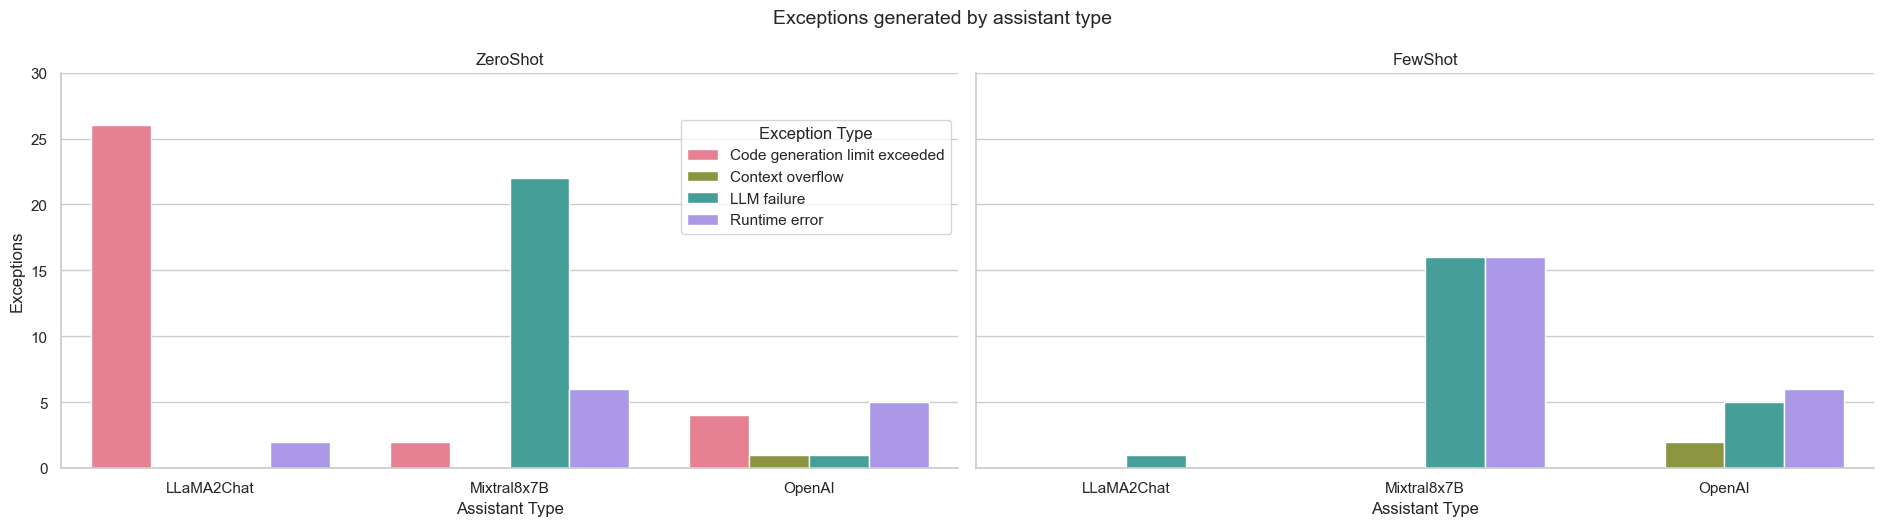

In [82]:
test = df.groupby(['merged_exceptions', 'code_assistant_type', 'prompt_type']).size().reset_index(name='counts')

ax = sns.catplot(
    data=test,
    x="code_assistant_type",
    y="counts",
    hue="merged_exceptions",
    kind="bar",
    aspect=1.9,
    palette='husl',
    col='prompt_type',
    legend_out=False,
)
ax.set_xlabels('Assistant Type', fontsize=12)
ax.set_ylabels('Exceptions', fontsize=12)
ax.fig.suptitle('Exceptions generated by assistant type', fontsize=14, y=1.05)

#plt.xlabel('Assistant Type', fontsize=12, labelpad=15)
#plt.ylabel('Exceptions', fontsize=12, labelpad=15)
#plt.title('Exceptions generated by assistnant type', fontsize=14, pad=20)
plt.ylim(0, 30)  # Set Y-axis limits

ax._legend.set_bbox_to_anchor((1, 0.9))  # Adjust legend position

for axes, title in zip(ax.axes.flat, ['ZeroShot', 'FewShot']):
    axes.set_title(title)

new_title = 'Exception Type'
ax._legend.set_title(new_title)


#plt.show()
plt.savefig('exceptions_prompt.png', dpi=300, bbox_inches='tight')
